In [15]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

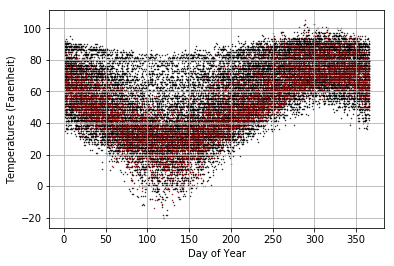

<function matplotlib.pyplot.annotate>

In [18]:
# A lifetime of temperatures
offset_day = pd.to_datetime('1975-09-21').dayofyear

Indiana = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Indiana.csv", index_col=1)
Indiana.index = pd.to_datetime(Indiana.index)
Indiana['DayofYear'] = Indiana.index.dayofyear
Indiana['DayofYear'] = np.where(Indiana['DayofYear']>= offset_day, Indiana['DayofYear']-offset_day+1, 366+Indiana['DayofYear']-offset_day)
plt.scatter(Indiana['DayofYear'], Indiana['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Indiana['DayofYear'], Indiana['TMIN'], c='black', linewidths=None, s=0.2)

Pittsburgh = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Pittsburgh.csv", index_col=1)
Pittsburgh.index = pd.to_datetime(Pittsburgh.index)
Pittsburgh['DayofYear'] = Pittsburgh.index.dayofyear
Pittsburgh['DayofYear'] = np.where(Pittsburgh['DayofYear']>= offset_day, Pittsburgh['DayofYear']-offset_day+1, 366+Pittsburgh['DayofYear']-offset_day)
plt.scatter(Pittsburgh['DayofYear'], Pittsburgh['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Pittsburgh['DayofYear'], Pittsburgh['TMIN'], c='black', linewidths=None, s=0.2)

Miami = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Miami.csv", index_col=1)
Miami.index = pd.to_datetime(Miami.index)
Miami['DayofYear'] = Miami.index.dayofyear
Miami['DayofYear'] = np.where(Miami['DayofYear']>= offset_day, Miami['DayofYear']-offset_day+1, 366+Miami['DayofYear']-offset_day)
plt.scatter(Miami['DayofYear'], Miami['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Miami['DayofYear'], Miami['TMIN'], c='black', linewidths=None, s=0.2)

Washington = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Washington.csv", index_col=1)
Washington.index = pd.to_datetime(Washington.index)
Washington['DayofYear'] = Washington.index.dayofyear
Washington['DayofYear'] = np.where(Washington['DayofYear']>= offset_day, Washington['DayofYear']-offset_day+1, 366+Washington['DayofYear']-offset_day)
plt.scatter(Washington['DayofYear'], Washington['TMAX'], c='black', linewidths=None, s=0.2)
plt.scatter(Washington['DayofYear'], Washington['TMIN'], c='black', linewidths=None, s=0.2)

Chicago = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/Chicago.csv", index_col=1)
Chicago.index = pd.to_datetime(Chicago.index)
Chicago['DayofYear'] = Chicago.index.dayofyear
Chicago['DayofYear'] = np.where(Chicago['DayofYear']>= offset_day, Chicago['DayofYear']-offset_day+1, 366+Chicago['DayofYear']-offset_day)
plt.scatter(Chicago['DayofYear'], Chicago['TMAX'], c='maroon', linewidths=None, s=0.2)
plt.scatter(Chicago['DayofYear'], Chicago['TMIN'], c='maroon', linewidths=None, s=0.2)

plt.grid()
plt.xlabel("Day of Year")
plt.ylabel('Temperatures (Farenheit)')
plt.show()
plt.savefig('images/lifetimeweather.png')
plt.annotate

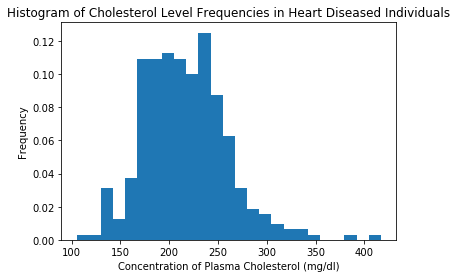

Mid-point of bin with max y: 229.8


In [31]:
# 3D Histogram

lipids = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/lipids.csv",header=4)
lipids = lipids[lipids['diseased']==1]

weights = (1/lipids['chol'].shape[0])*np.ones_like(lipids['chol'])
y, x, _ = plt.hist(lipids['chol'],weights=weights,bins=25)
plt.xlabel('Concentration of Plasma Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Level Frequencies in Heart Diseased Individuals')
plt.show()
plt.savefig('images/2dhistogram.png')
max_y_ind = np.argmax(np.array(y))
print('Mid-point of bin with max y:', (x[max_y_ind]+x[max_y_ind])/2)

As seen in the histogram above and the calculated value, the midpoint of the bin with the highest frequency is 229.8.

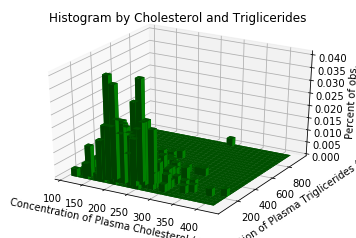

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(25)
hist, xedges, yedges = np.histogram2d(lipids['chol'], lipids['trig'], bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('Concentration of Plasma Cholesterol (mg/dl)')
ax.set_ylabel('Concentration of Plasma Triglicerides (mg/dl)')
ax.set_zlabel('Percent of obs.')
plt.title('Histogram by Cholesterol and Triglicerides')
plt.savefig('images/3dhistogram.png')
plt.show()

When looking at the 3D histogram, it can be seen that there are multiple bins in the plasma cholesterol with a similar amount of plasma triglicerides that are high percentages of the diseased observations. Thus, I would say the most at-risk group is those with cholesterol from 250 to 250 and plasma triglicerides from 200 to 400. 

In [85]:
# Comparing Segments of Time Series

payems = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/payems.csv",header=5)
payems['payems'] = payems['payems']*1000
payems['date'] = pd.to_datetime(payems['date'])
payems.iloc[:346,0] = payems.iloc[:346,0] - pd.DateOffset(years=100)

# Buckets last one year before and seven years after the recession
recessions = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/ProbSets/Comp/Week_2/recessions.csv",squeeze=True,header=None,names=['Peak Date'])
recessions = pd.to_datetime(recessions)


series1 = 
def make_series(i):
    
        

print(recessions)

0    1929-08-01
1    1937-05-01
2    1945-02-01
3    1948-11-01
4    1953-07-01
5    1957-08-01
6    1960-04-01
7    1969-12-01
8    1973-11-01
9    1980-01-01
10   1981-07-01
11   1990-07-01
12   2001-03-01
13   2007-12-01
Name: Peak Date, dtype: datetime64[ns]
